In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('tripadvisor.csv')

In [3]:
#As noticed we have only 2 columns, that is the Rating review (0 to 5) and the review itself written
data.head()

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [6]:
len(data.index)
#We have 147,581 Rows (reviews)

147581

In [8]:
#We have 2 Null values in the Reviews Column that we will remove
data.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [10]:
#Here we drop the rows containing null values
data = data.dropna()

In [11]:
#To check the null values we are ready to go!
data.isnull().sum()

rating_review    0
review_full      0
dtype: int64

In [12]:
#Creating a function to categorize the reviews
#We have 0 to 5 scale reviews, where 0 and 1 is negative(-1), 4 and 5 is positive(1) and any other review is netural(0)
def sentiment_analysis(review):
    if review == 0 or review == 1: #for negative review
        return -1 
    elif review == 4 or review == 5: #for positive review
        return 1
    else: 
        return 0 #for neutral review
data['Sentiment'] = data['rating_review'].apply(sentiment_analysis)

In [13]:
#Here we can see that our new column "Sentiment" contains the Positive, Neutral or negative review in total
#That Sentiment will be our Target for our model to predict
data.head()

,rating_review,review_full,Sentiment
0,5,"Totally in love with the Auro of the place, re...",1
1,5,I went this bar 8 days regularly with my husba...,1
2,5,We were few friends and was a birthday celebra...,1
3,5,Fatjar Cafe and Market is the perfect place fo...,1
4,5,"Hey Guys, if you are craving for pizza and sea...",1


In [32]:
#Plotting the reviews Count overall
data['rating_review'].value_counts()

5    72389
4    50248
3    15935
2     4552
1     4455
Name: rating_review, dtype: int64

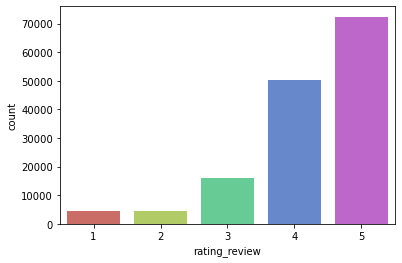

<Figure size 432x288 with 0 Axes>

In [35]:
sns.countplot(x='rating_review', data=data, palette='hls')
plt.show()
plt.savefig('Counting Plot')

In [14]:
#Now we can pre-process the reviews to remove the puncituation, special characters, digits and any noises
from sklearn.feature_extraction.text import re

def clean_review(review):
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)

In [16]:
#lookin at an example of the reviews we have you can see there is special characters, commas, punctuations
#Applying our function clean_review will clean the text of noise in order to prepare our model
data['review_full'][0]

"Totally in love with the Auro of the place, really beautiful and quite fancy at the same time. The ambience is very pure and gives a sense of positivity throughout. Outdoor and indoor interior are quite quaint and cute. Love the open kitchen idea and there whole marketplace ideology. Due to coronovirus they specifically use disposable cutlery to keep the pandemic in mind taking all the precautionary measures from the beginning of the place with the mask on their staff and using good sanitisation. The food is really amazing specially the pizza straight from the oven and the hummus and pita bread are quite delicious too. If you're looking for a classy yet soothing Italian place in Delhi,Fatjar is a go to for you!"

In [17]:
#Here you can see the text is cleaned and ready to go to the model
data['review_full'] = data['review_full'].apply(clean_review)
data['review_full'][0]

'Totally in love with the Auro of the place really beautiful and quite fancy at the same time The ambience is very pure and gives a sense of positivity throughout Outdoor and indoor interior are quite quaint and cute Love the open kitchen idea and there whole marketplace ideology Due to coronovirus they specifically use disposable cutlery to keep the pandemic in mind taking all the precautionary measures from the beginning of the place with the mask on their staff and using good sanitisation The food is really amazing specially the pizza straight from the oven and the hummus and pita bread are quite delicious too If youre looking for a classy yet soothing Italian place in DelhiFatjar is a go to for you'

In [18]:
#in order to create a model to process the texts, we need to transform the text into numeric form for the model to read them
#So by using sklearn libraries we can apply TF-IDF Transformation to reach our goal
#TF-IDF Algorithm basically do 2 things, 
#TF: first analyze the most repeated words with frequency count as they are important for the model
#IDF: Here the model analyze the repeated words across a complete document in order to not give it importance like the naturally
#Existed words as 'you' 'the' 'a' 

#So we clean the text and put it as our features in a numeric vector form

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(data['review_full'])

In [28]:
#creating our training and testing dataset
from sklearn.model_selection import train_test_split

y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size=0.25)
#Making our Test Size 20% of the data and the training size 80%

In [29]:
#As it's a classifcation problem, we will use logistic regression classifier 
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear') #using liblinear optimizer as our dataset is small and it's a one-versus-rest scheme
logistic_model.fit(X_train,y_train) #Fitting the model to the train and test
predictions = logistic_model.predict(X_test) #Making the predictions to test our model

In [30]:
#Testing our model and calculating the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)

#We have a nearly 90% Accuracy 

0.8916655373356823